In [74]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [91]:
df = pd.read_csv('data/train_data.csv', delimiter=',')

cols = df.columns[3:-1]
numFeatures = len(cols)

df = df.dropna(subset=cols) #drop na cells 

df.head()

,Unique_idx,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7291,4058200630,20141002T000000,3,1.75,2190,7021,1.0,0,2,...,1390,800,1953,0,98178,47.5033,-122.232,2180,7155,353000
1,14835,3613600150,20150105T000000,3,2.50,2370,6840,2.0,0,0,...,2370,0,1987,0,98119,47.6503,-122.366,1590,4400,300523
2,15880,7170200080,20140617T000000,2,1.00,1230,3800,1.0,0,0,...,1230,0,1928,0,98115,47.6797,-122.292,1610,3800,435000
3,8812,9542300530,20141124T000000,4,2.25,2510,9963,1.0,0,0,...,2200,310,1967,0,98005,47.5973,-122.177,3110,9963,800000
4,17220,3626039028,20140818T000000,3,1.00,1160,7491,1.0,0,0,...,1160,0,1917,0,98177,47.7024,-122.359,1800,2267,417500


In [76]:
df.describe()

,Unique_idx,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04
mean,10821.135454,4.577035e+09,3.366455,2.111567,2074.586293,1.521099e+04,1.493522,0.007750,0.234182,3.410700,...,1782.821920,291.764372,1970.915095,84.596992,98078.057779,47.559674,-122.214147,1984.131463,12790.231984,5.378806e+05
std,6233.894051,2.877097e+09,0.934061,0.765353,903.771540,4.282989e+04,0.540177,0.087696,0.763897,0.651334,...,816.765091,441.081555,29.418996,402.087484,53.559522,0.138770,0.140738,681.613827,27728.922431,3.539798e+05
min,0.000000,1.000102e+06,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,7.500000e+04
25%,5408.500000,2.122785e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470225,-122.329000,1490.000000,5100.000000,3.220000e+05
50%,10857.500000,3.904921e+09,3.000000,2.250000,1920.000000,7.605000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.231000,1840.000000,7615.000000,4.500000e+05
75%,16222.500000,7.308600e+09,4.000000,2.500000,2550.000000,1.063075e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.125000,2360.000000,10067.500000,6.450000e+05
max,21612.000000,9.900000e+09,33.000000,6.750000,9640.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,5.570000e+06


In [77]:
df.dtypes

Unique_idx         int64
id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [78]:
df = df[df.bedrooms <= 15]
df = df[df.sqft_lot <= 1250000]
df = df[df.sqft_above <= 7000]
df = df[df.sqft_basement <= 3500]
df = df[df.sqft_lot15 <= 500000]

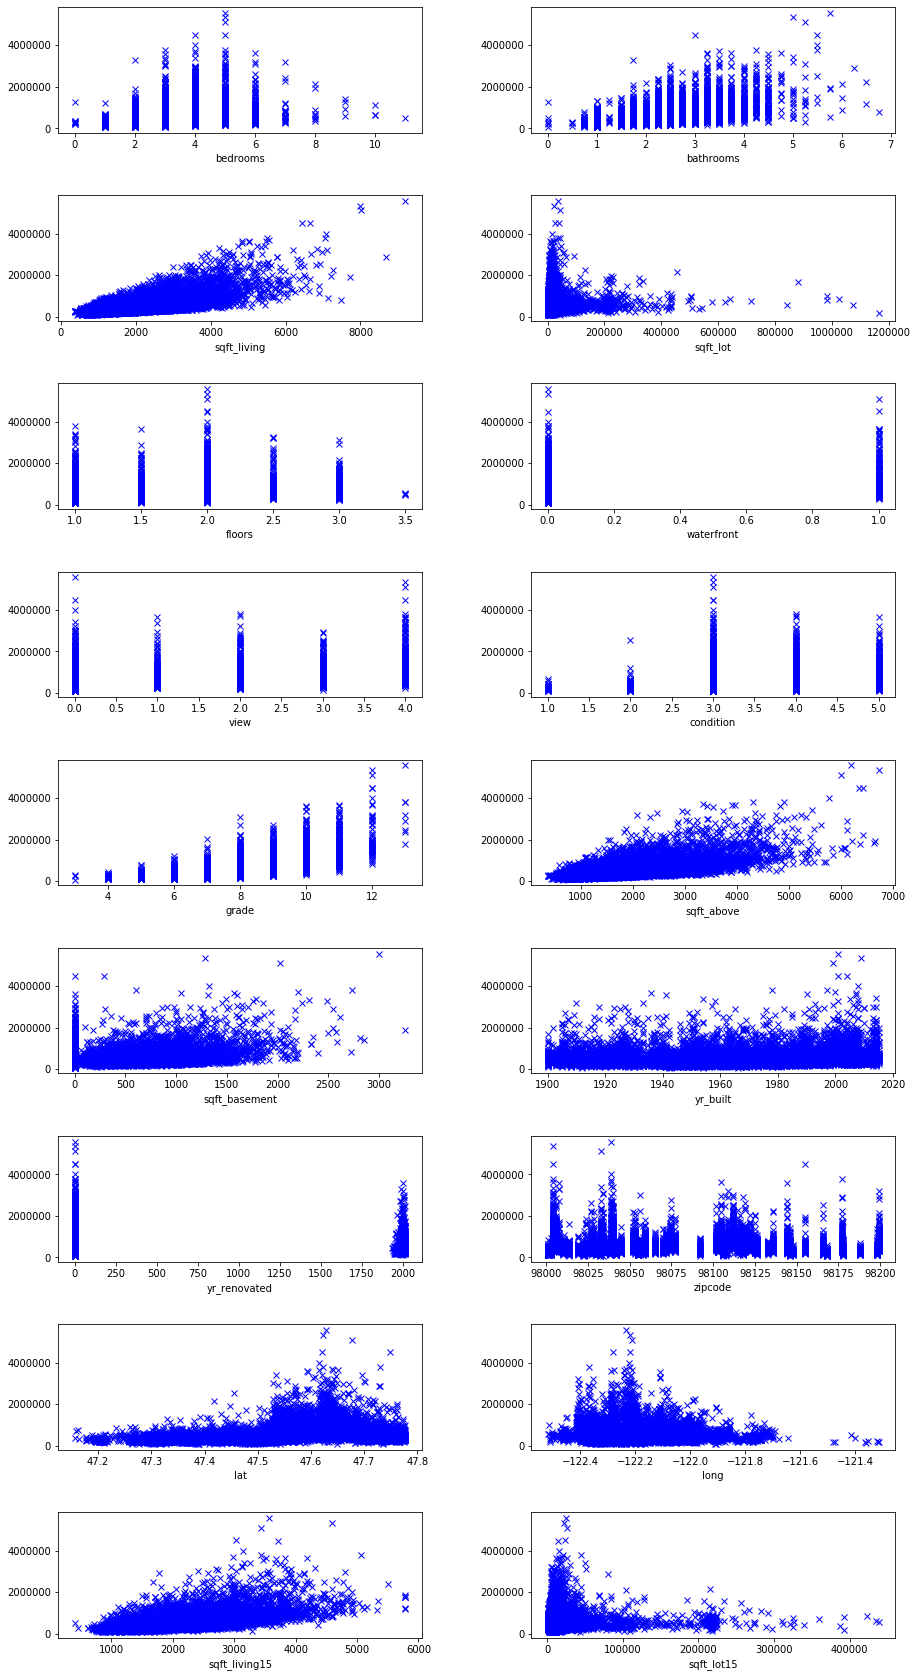

In [79]:
fig, axes = plt.subplots(9,2, figsize = (15,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
   
i = 0
j = 0
for k in range(numFeatures):
    if j > 1:
        j = 0
        i += 1
        
    axes[i][j].plot(df[cols[k]], df['price'], 'bx')
    axes[i][j].set_xlabel(cols[k])
    j += 1

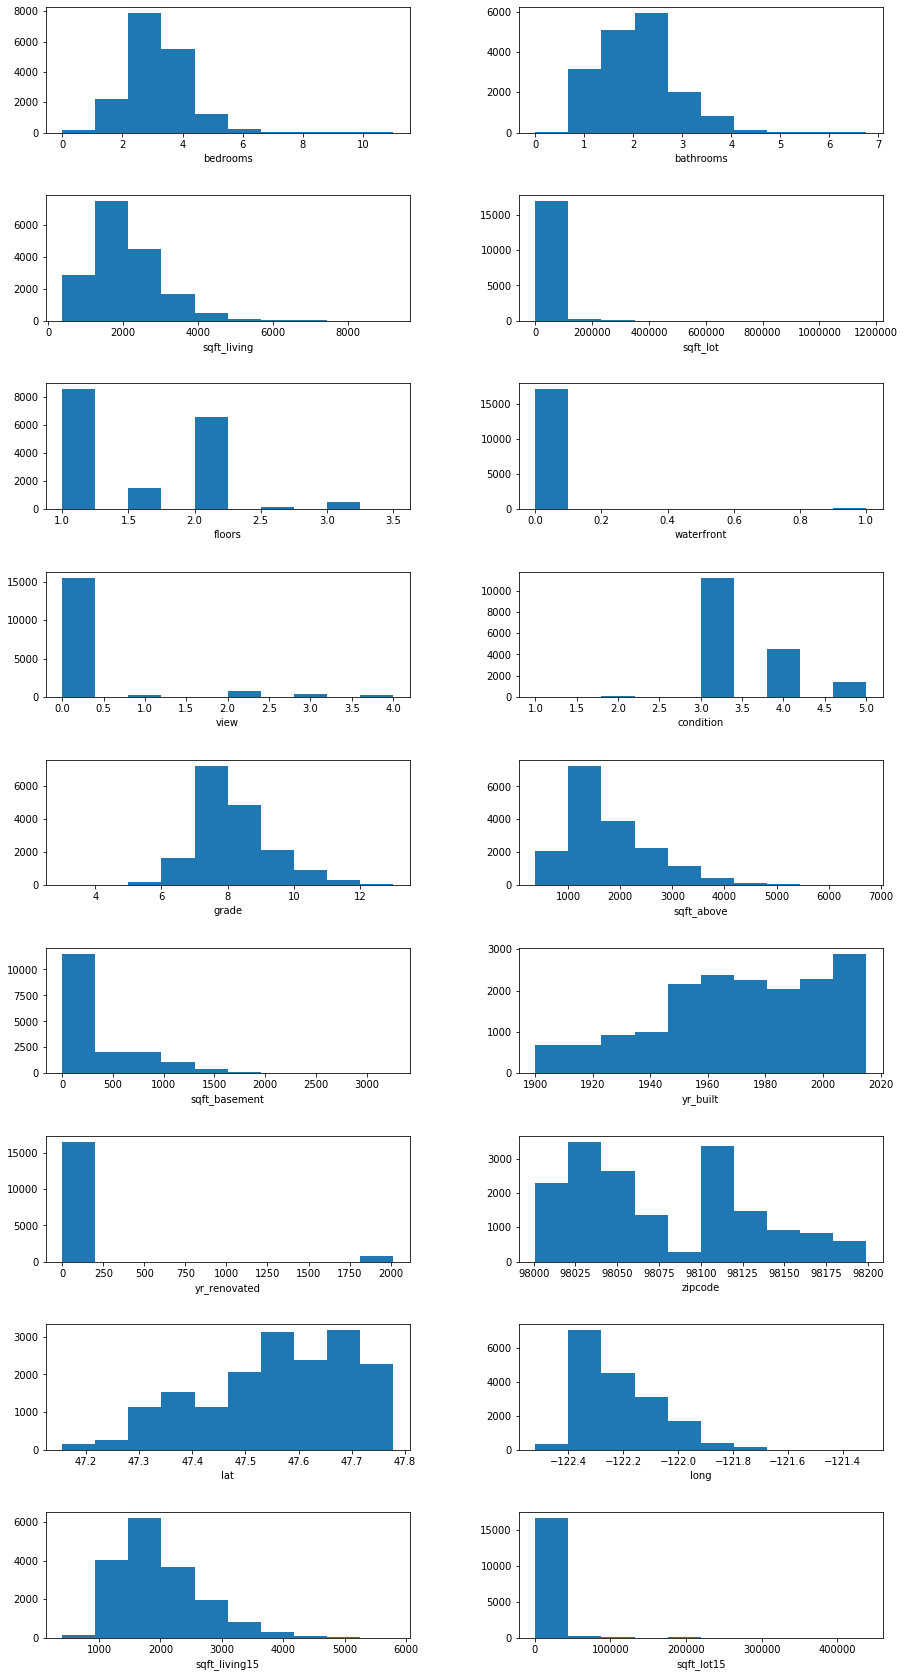

In [80]:
fig, axes = plt.subplots(9,2, figsize = (15,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
   
i = 0
j = 0
for k in range(numFeatures):
    if j > 1:
        j = 0
        i += 1
        
    axes[i][j].hist(df[cols[k]])
    axes[i][j].set_xlabel(cols[k])
    j += 1

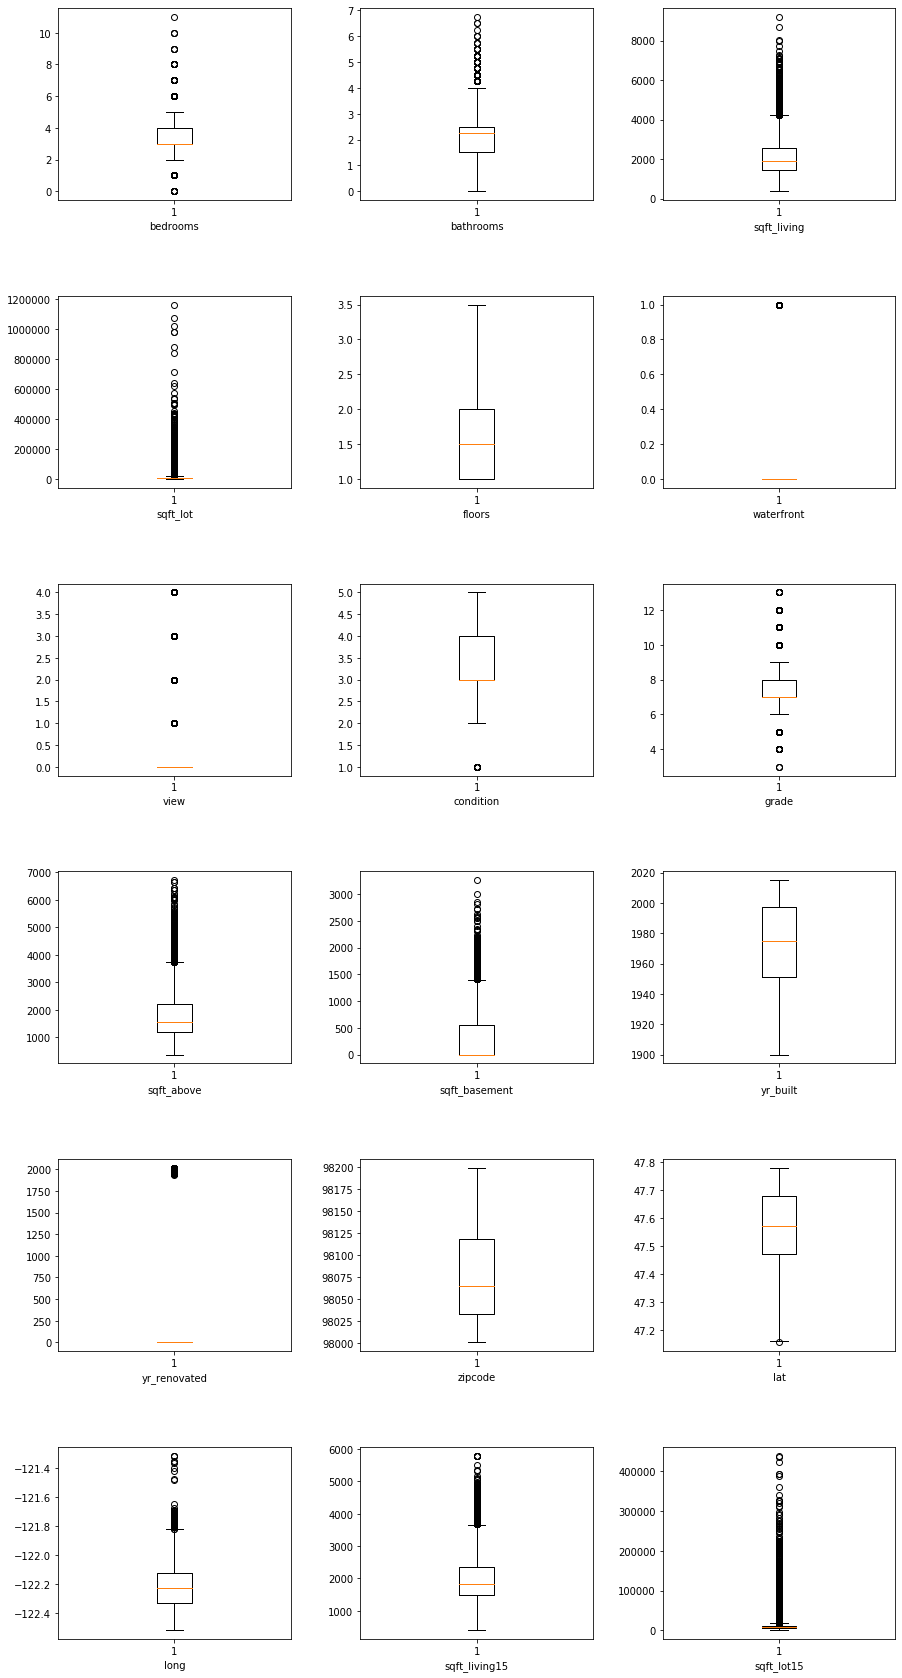

In [81]:
fig, axes = plt.subplots(6,3, figsize = (15,30))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
   
i = 0
j = 0
for k in range(numFeatures):
    if j > 2:
        j = 0
        i += 1
        
    axes[i][j].boxplot(df[cols[k]])
    axes[i][j].set_xlabel(cols[k])
    j += 1

In [82]:
df[cols].corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.524752,0.593541,0.029743,0.176999,-0.014225,0.080060,0.023332,0.362643,0.489420,0.308522,0.161114,0.021286,-0.159132,-0.007148,0.136826,0.400753,0.027663
bathrooms,0.524752,1.000000,0.752229,0.089424,0.503924,0.051400,0.180085,-0.130641,0.662359,0.680287,0.279846,0.510338,0.049955,-0.206363,0.026455,0.225661,0.566189,0.083977
sqft_living,0.593541,0.752229,1.000000,0.174117,0.355932,0.089733,0.274586,-0.061657,0.762543,0.873136,0.429857,0.324866,0.050490,-0.201108,0.051970,0.242409,0.758307,0.181349
sqft_lot,0.029743,0.089424,0.174117,1.000000,-0.001387,0.025342,0.069036,-0.006797,0.117055,0.186374,0.011231,0.061256,0.000394,-0.130875,-0.089158,0.228754,0.144839,0.693244
floors,0.176999,0.503924,0.355932,-0.001387,1.000000,0.022507,0.027405,-0.266675,0.458817,0.528276,-0.249847,0.494327,0.006071,-0.062652,0.046334,0.127424,0.280296,-0.009682
waterfront,-0.014225,0.051400,0.089733,0.025342,0.022507,1.000000,0.404448,0.022751,0.074530,0.062105,0.068660,-0.030257,0.089580,0.030843,-0.017200,-0.046439,0.079723,0.033502
view,0.080060,0.180085,0.274586,0.069036,0.027405,0.404448,1.000000,0.042282,0.245021,0.158639,0.268266,-0.052515,0.102365,0.088677,0.002024,-0.079878,0.271409,0.069314
condition,0.023332,-0.130641,-0.061657,-0.006797,-0.266675,0.022751,0.042282,1.000000,-0.148470,-0.163553,0.176714,-0.361886,-0.058988,0.004484,-0.019434,-0.107856,-0.094357,-0.000097
grade,0.362643,0.662359,0.762543,0.117055,0.458817,0.074530,0.245021,-0.148470,1.000000,0.755365,0.161901,0.449456,0.010851,-0.183122,0.113710,0.201251,0.712211,0.117296
sqft_above,0.489420,0.680287,0.873136,0.186374,0.528276,0.062105,0.158639,-0.163553,0.755365,1.000000,-0.064818,0.431750,0.019360,-0.263660,-0.002735,0.347068,0.734252,0.192416


In [83]:
dfWater = df[df.iloc[:,8] == 1]
dfLand = df[df.iloc[:,8] == 0]
ratio = round(np.mean(dfWater['price']) / np.mean(dfLand['price']),2)
print('Waterfront/Non-Waterfront price ratio:', ratio)

Waterfront/Non-Waterfront price ratio: 2.92


Because the means differ so drastically and the associated p-value of the waterfront feature is so low, we need to keep this binary feature.

In [84]:
scores = []
for i in df['yr_renovated']:
    if i != 0:
        scores.append((i - 2015) + 82)
    else:
        scores.append(0)
df['yr_renovated'] = scores
df.drop(['yr_renovated'], axis=1)
df.rename(columns={'yr_renovated': "renovation_score"})

,Unique_idx,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,renovation_score,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7291,4058200630,20141002T000000,3,1.75,2190,7021,1.0,0,2,...,1390,800,1953,0,98178,47.5033,-122.232,2180,7155,353000
1,14835,3613600150,20150105T000000,3,2.50,2370,6840,2.0,0,0,...,2370,0,1987,0,98119,47.6503,-122.366,1590,4400,300523
2,15880,7170200080,20140617T000000,2,1.00,1230,3800,1.0,0,0,...,1230,0,1928,0,98115,47.6797,-122.292,1610,3800,435000
3,8812,9542300530,20141124T000000,4,2.25,2510,9963,1.0,0,0,...,2200,310,1967,0,98005,47.5973,-122.177,3110,9963,800000
4,17220,3626039028,20140818T000000,3,1.00,1160,7491,1.0,0,0,...,1160,0,1917,0,98177,47.7024,-122.359,1800,2267,417500
5,18565,7657000540,20150304T000000,4,1.00,1220,7980,1.5,0,0,...,1220,0,1944,0,98178,47.4924,-122.237,1210,7920,260000
6,335,5009600070,20141007T000000,4,2.50,1960,5238,2.0,0,0,...,1960,0,2003,0,98038,47.3483,-122.052,1800,5894,260000
7,6273,3905050280,20140819T000000,3,2.50,2060,4812,2.0,0,0,...,2060,0,1990,0,98029,47.5793,-122.002,1930,5264,533000
8,10979,1925059200,20150407T000000,4,2.50,2700,17853,2.0,0,0,...,2700,0,1960,0,98004,47.6463,-122.219,3790,16672,1557600
9,13225,424069010,20140721T000000,4,2.25,2470,17008,2.0,0,0,...,2470,0,1979,0,98075,47.5924,-122.048,2470,31798,625000


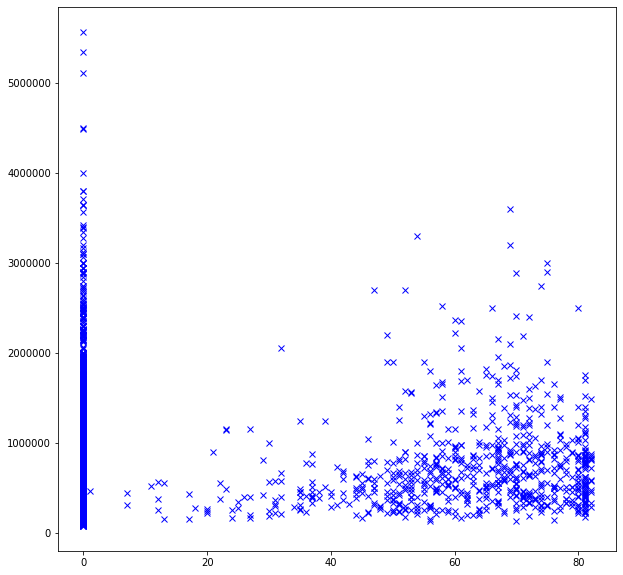

In [87]:
fig, axes = plt.subplots(1,1, figsize = (10,10))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
axes.plot(scores, df['price'], 'bx')

**RENOVATION SCORE:** A house's renovation score is entirely based on how recently said house was renovated. The scale is based on a range of [0 - 82], 0 meaning the house has never been renovated and 82 meaning the house was renovated the year the survey was taken.

**ALL CHANGES TO THE DF ARE IN THE NEXT CELL**

In [92]:
df = pd.read_csv('data/train_data.csv', delimiter=',')

cols = df.columns[3:-1]
numFeatures = len(cols)

df = df.dropna(subset=cols) #drop na cells 

df = df[df.bedrooms <= 15]
df = df[df.sqft_lot <= 1250000]
df = df[df.sqft_above <= 7000]
df = df[df.sqft_basement <= 3500]
df = df[df.sqft_lot15 <= 500000]

scores = []
for i in df['yr_renovated']:
    if i != 0:
        scores.append((i - 2015) + 82)
    else:
        scores.append(0)
df['yr_renovated'] = scores
df.drop(['yr_renovated'], axis=1)
df.rename(columns={'yr_renovated': "renovation_score"})

,Unique_idx,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,renovation_score,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7291,4058200630,20141002T000000,3,1.75,2190,7021,1.0,0,2,...,1390,800,1953,0,98178,47.5033,-122.232,2180,7155,353000
1,14835,3613600150,20150105T000000,3,2.50,2370,6840,2.0,0,0,...,2370,0,1987,0,98119,47.6503,-122.366,1590,4400,300523
2,15880,7170200080,20140617T000000,2,1.00,1230,3800,1.0,0,0,...,1230,0,1928,0,98115,47.6797,-122.292,1610,3800,435000
3,8812,9542300530,20141124T000000,4,2.25,2510,9963,1.0,0,0,...,2200,310,1967,0,98005,47.5973,-122.177,3110,9963,800000
4,17220,3626039028,20140818T000000,3,1.00,1160,7491,1.0,0,0,...,1160,0,1917,0,98177,47.7024,-122.359,1800,2267,417500
5,18565,7657000540,20150304T000000,4,1.00,1220,7980,1.5,0,0,...,1220,0,1944,0,98178,47.4924,-122.237,1210,7920,260000
6,335,5009600070,20141007T000000,4,2.50,1960,5238,2.0,0,0,...,1960,0,2003,0,98038,47.3483,-122.052,1800,5894,260000
7,6273,3905050280,20140819T000000,3,2.50,2060,4812,2.0,0,0,...,2060,0,1990,0,98029,47.5793,-122.002,1930,5264,533000
8,10979,1925059200,20150407T000000,4,2.50,2700,17853,2.0,0,0,...,2700,0,1960,0,98004,47.6463,-122.219,3790,16672,1557600
9,13225,424069010,20140721T000000,4,2.25,2470,17008,2.0,0,0,...,2470,0,1979,0,98075,47.5924,-122.048,2470,31798,625000
